In [187]:
#imports

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm 
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D

from plots import plot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier

[[ 1.8403464  -2.03061705]
 [ 2.92816826  0.3830935 ]
 [ 2.41019992  0.69206761]
 [ 1.71870509  1.84847671]
 [ 2.65513004  0.7609046 ]
 [ 2.38252055 -2.43031835]
 [ 2.29580445  0.91627841]
 [ 1.76138713  3.06472838]
 [ 2.86549714  0.26519784]
 [ 2.93461847  1.10103199]
 [ 2.65578506  0.83162339]
 [ 1.5886113  -2.11169521]
 [ 1.47628755  0.3984947 ]
 [ 2.67635602 -0.35224958]
 [ 2.75659308  1.98803996]
 [ 2.30141556  2.09169026]
 [ 1.16946108 -0.95311655]
 [ 2.36088338  1.26872595]
 [-0.23180328  1.22810509]]


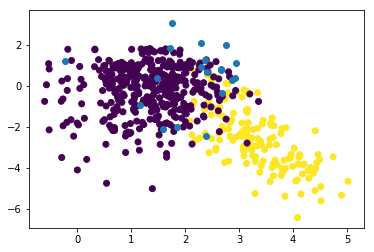

In [189]:
#load datasets
posMat = loadmat('truePositivesScores')
negMat = loadmat('trueNegativesScores')
isihMat = loadmat('isihScores')
wfMat = loadmat('wfScores')
unitsMat = loadmat('unitBeforeSet')
#scores set
xPos = posMat['truePositives']
xNeg = negMat['trueNegatives']
xPos[:,[0,1]] = xPos[:,[1,0]]
xNeg[:,[0,1]] = xNeg[:,[1,0]]


isihScores =isihMat['isihScores']
wfScores = wfMat['wfScores']
xCompare = np.concatenate((wfScores,isihScores),1)
print(xCompare)
X = np.concatenate((xPos,xNeg))
#labels set
lPos = np.ones(xPos.shape[0]) #stable units are in class 1
lNeg = np.zeros(xNeg.shape[0]) #unstable units are in class 0
y = np.concatenate((lPos,lNeg))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)


#plt.scatter(X[:,1],X[:,0],None,Y)
plt.scatter(*X.T,c =Y)
plt.scatter(*xCompare.T)

In [190]:
#fit model
#tuned_parameters = [{'kernel': ['linear'], 'gamma': [1e-3, 1e-4],
#                     'C': [ 10, 100, 1000]},
#                    {'kernel': ['linear'], 'C': [0.001,0.01,0.1,1, 10, 100, 1000]}]
tuned_parameters = [{'kernel': ['linear'], 'C' : [0.001,0.01,0.1,1, 10, 100, 1000]}]
#clf = svm.SVC(kernel = "linear",gamma = "auto", C = 1)
#scores = cross_val_score(clf, X, y, cv=5)
#svc = svm.SVC(kernel = "linear",gamma = "auto", C = 1)
#clf = GridSearchCV(svc,parameters)
#clf = GridSearchCV(estimator=svm.SVC(), param_grid=tuned_parameters,cv = 5)
clf = SGDClassifier(loss = 'hinge',penalty = 'l2', max_iter = 500)
scores
clf.fit(X_train,y_train)
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
stableUnits = clf.predict(xCompare)
print(stableUnits)
#plot(X, Y, clf)

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       327
         1.0       0.91      0.88      0.90       117

   micro avg       0.95      0.95      0.95       444
   macro avg       0.93      0.92      0.93       444
weighted avg       0.95      0.95      0.95       444

[0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


C:\Users\Toussain\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [194]:
#channels = unitsMat['channel']


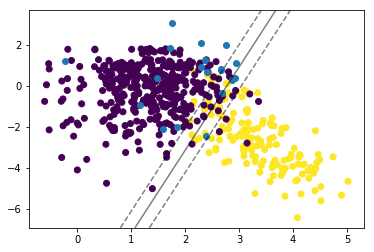

In [191]:
plt.scatter(*X.T,c =Y)
plt.scatter(*xCompare.T)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])

#print(clf.best_params_)
